# Programming Exercise 3nn: MNIST on a neural network already trained

In this exercise we're using an already trained NN to identify characters from the MNIST database to experiment with feedforward propagation algorithm.

In [16]:
# Importing the needed libraries
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Optimization module in scipy
#from scipy import optimize

# We'll use loadmap to load the matlab dataset
from scipy.io import loadmat

# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [17]:
# Computing the sigmoid function
# It only works with x being an array.
# you can convert any value or Python's list to an array using numpy.array(list)
def sigmoid(x):
    z = np.exp(-x)
    g = (1/(1+z))
    return g


# Feedforward propagation algorithm
# Generic function that can work with any shape of NN
# Theta = an array that contains the Theta[i] arrays for the various layers i
# nnDef = NN definition. Vector that defines the number of nodes per each layer
# Predict the label of an input given a trained neural network
# p outputs the predicted label of X given the trained weights of a neural network (Theta)
# Pred outputs the array with the probabilities for being each value
def feedForwardPropagation(Theta, X, nnDef):
    # Useful variables
    (m, n) = X.shape                   # m = number of training examples, n = number of features
    num_labels = nnDef[-1]             # Output Layer units
    num_layers = nnDef.size            # Number of layers including the Input Layer
    p = np.zeros((1, num_labels))       # Classification vector
    Prob = np.zeros((m, num_labels))    # Matrix contaning all the probabilities per label
    # layerActiv= Array containing the activation arrays
    layerActiv = np.zeros((nnDef.size,), dtype=np.ndarray)

    layerActiv[0] = X             # The activation for the Input layer is X

    for i in range(num_layers-1):
        # Add the bias unit to the activation
        mLayer = layerActiv[i].shape[0]
        layerActiv[i] = np.append(np.ones((mLayer, 1)), layerActiv[i], axis=1)
        layerActiv[i+1] = sigmoid(np.dot(layerActiv[i], Theta[i].T))

    Prob = layerActiv[-1]
    p = np.argmax(layerActiv[-1], axis=1)

    return Prob, p

Defining the parameters for this exercise

In [18]:
input_layer_size  = 400  # 20x20 Input Images of Digits
hidden_layer_size = 25   # 25 hidden units
num_labels = 10          # 10 labels, from 0 to 9 - output layer

# trying to represent the NN using an array.
# nnDef.shape[0] = number of layers
# nnDef[i] = number of neurons on layer i
nnDef = np.array([input_layer_size, hidden_layer_size, num_labels])

## Loading and parsing data from a Matlab file

In [19]:
# Loading all data on a dictonary
data = loadmat('ex3data1.mat')

# Convert the data into a numpy array
X = data['X']
y = data['y'].flatten()

# m = number of training examples
# n = number of features
(m,n) = X.shape

# note that X has mapped "0" to label 10 because Matlab arrays start on 1
# We'll normalize the 10 value back to 0, so it matches the 0 digit
y[y == 10] = 0

## Load the weights into variables Theta1 and Theta2

In [20]:
thetaMat = loadmat('ex3weights.mat')

In [21]:
Theta1 = thetaMat['Theta1']
Theta2 = thetaMat['Theta2']

# swap first and last columns of Theta2, due to legacy from MATLAB indexing, 
# since the weight file ex3weights.mat was saved based on MATLAB indexing
# Explanation: 0 in MATLAB is represented by 10. 
# Therefore the theta for 10 in Matlab corresponds with 0 in Python
Theta2 = np.roll(Theta2, 1, axis=0)

# We create a Theta
Theta = np.array([Theta1, Theta2], dtype=np.ndarray)

Analizing the shape of <code>theta1</code> and <code>theta2</code> we see the coherence with the parameters defined for this exercise.
* The Input Layer is made of 401 units (The images are 20x20 plus the bias unit = 401). The Hidden Layer is made of 25 nodes. Thus, <code>theta1</code> is (25, 401).
* There is only one Hidden Layer. The Output Layer is made by 10 units (10 output labels) and it comes from 26 units (25 nodes from the Hidden Layer plus the bias unit).

## Running feedforward propagation and prediction

We run feedforward propagation to make the prediction

In [22]:
Prob, pred = feedForwardPropagation(Theta, X, nnDef)

In [23]:
print('\nTraining Set Accuracy: {:.2f} %'.format(np.mean(pred == y) * 100))


Training Set Accuracy: 97.52 %


## Seeing some examples to see what's predicting

In [24]:
# We determine how many case we want to see
testCases = 10

# We get a testCases random datapoints. First we get a number of testCases indices out of m
rand_indices = np.random.choice(m, testCases, replace=False)

# Second, we load these random vectors in the sel array
selX = X[rand_indices, :]
sely = y[rand_indices]
selPred = pred[rand_indices]

In [25]:
# Creating the table data
columns = ('Predicted', 'Actual')
testData = ([[selPred[i], sely[i]] for i in range(testCases)])

<function matplotlib.pyplot.show(close=None, block=None)>

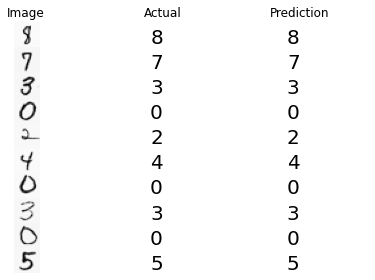

In [26]:
fig = plt.figure()
gs = fig.add_gridspec(testCases, 3, hspace=0, wspace=0)
ax = gs.subplots(sharex='col', sharey='row')

cols=['Image', 'Actual','Prediction']
for i in range(testCases):
    img = selX[i].reshape(20,20).T
    ax[i, 0].imshow(img, cmap='Greys')
    ax[i, 0].set_axis_off()
    ax[i, 1].text(0.5, 0,sely[i], verticalalignment='bottom', horizontalalignment='right', fontsize=20, transform=ax[i, 1].transAxes)
    ax[i, 1].set_xticks([])
    ax[i, 1].set_yticks([])
    ax[i, 1].spines['top'].set_visible(False)
    ax[i, 1].spines['bottom'].set_visible(False)
    ax[i, 1].spines['left'].set_visible(False)
    ax[i, 1].spines['right'].set_visible(False)
    ax[i, 2].text(1.5, 0,selPred[i], verticalalignment='bottom',horizontalalignment='right',fontsize=20, transform=ax[i, 1].transAxes)
    ax[i, 2].spines['top'].set_visible(False)
    ax[i, 2].spines['bottom'].set_visible(False)
    ax[i, 2].spines['left'].set_visible(False)
    ax[i, 2].spines['right'].set_visible(False)
    ax[i, 2].set_xticks([])

for axe, col in zip(ax[0], cols):
    axe.set_title(col)

fig.tight_layout()
plt.show